# Big Data Real-Time Analytics with Python and Spark

## Chapter 4 - Case Study 3 - Exploratory Data Analysis and Data Wrangling to E-Commerce Analytics

**Note:** We are working in a big data science project divided in 3 chapters:
* **Exploratory data analysis** 
    - **EDA part 1**
    - **EDA part 2** 
* Attribute Engineering
* Data Preprocessing

![CaseStudy3 DSA](images/CaseStudy3.png "Case Study 3 DSA")

In [1]:
# Python Version
from platform import python_version
print("The version used in this notebook: ", python_version())

The version used in this notebook:  3.8.13


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
%reload_ext watermark
%watermark -a "Bianca Amorim" --iversions

Author: Bianca Amorim

matplotlib: 3.4.3
numpy     : 1.22.3
pandas    : 1.4.2
seaborn   : 0.11.2



In [4]:
# Global configuration parameters for the graphs
# Strategy in case you do not want to be setting parameters graph by graph
# If you want to creat all graphs with the same dimension, x and y configuration

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

You can see more with:
https://matplotlib.org/stable/tutorials/introductory/customizing.html

## Loading dataset

In [5]:
df = pd.read_csv('datasets/dataset.csv')

In [6]:
df.shape

(11000, 12)

In [7]:
# We can see that anyone has nan values
# Attention because sometimes pandas does not recognize the righ data type
# But we can use this to starting point.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       11000 non-null  int64 
 1   corredor_armazem         11000 non-null  object
 2   modo_envio               11000 non-null  object
 3   numero_chamadas_cliente  11000 non-null  int64 
 4   avaliacao_cliente        11000 non-null  int64 
 5   custo_produto            11000 non-null  int64 
 6   compras_anteriores       11000 non-null  int64 
 7   prioridade_produto       11000 non-null  object
 8   genero                   11000 non-null  object
 9   desconto                 11000 non-null  int64 
 10  peso_gramas              11000 non-null  int64 
 11  entregue_no_prazo        11000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# We can observe that each line represent an product 
# And we have categorical and numerical variables
df.head(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
0,1,D,Aviao,4,2,177,3,baixa,F,44,1233,1
1,2,F,Aviao,4,5,216,2,baixa,M,59,3088,1
2,3,A,Aviao,2,2,183,4,baixa,M,48,3374,1
3,4,B,Aviao,3,3,176,4,media,M,10,1177,1
4,5,C,Aviao,2,2,184,3,media,F,46,2484,1


In [9]:
df.sample(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
7703,7704,F,Navio,5,5,269,5,baixa,F,6,1630,0
7875,7876,B,Navio,3,3,216,4,baixa,F,9,5107,1
6373,6374,F,Navio,3,5,206,3,baixa,F,6,4620,1
10983,10984,B,Navio,4,3,229,6,media,M,1,1235,1
5626,5627,C,Aviao,4,4,139,2,alta,F,9,4446,1


In [10]:
df.tail(5)

,ID,corredor_armazem,modo_envio,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,prioridade_produto,genero,desconto,peso_gramas,entregue_no_prazo
10995,10996,B,Navio,4,1,232,5,media,F,6,1247,0
10996,10997,C,Navio,5,4,242,5,baixa,F,4,1155,0
10997,10998,F,Navio,5,2,223,6,media,M,2,1210,0
10998,10999,D,Navio,2,5,155,5,baixa,F,6,1639,0
10999,11000,C,Navio,4,2,255,5,baixa,F,6,1739,0


# EDA - Part 1
#### Separation of Categorical and Numerical Variables

In [11]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [12]:
df.dtypes

ID                          int64
corredor_armazem           object
modo_envio                 object
numero_chamadas_cliente     int64
avaliacao_cliente           int64
custo_produto               int64
compras_anteriores          int64
prioridade_produto         object
genero                     object
desconto                    int64
peso_gramas                 int64
entregue_no_prazo           int64
dtype: object

In [13]:
# List of the categorical variables
cats = ['corredor_armazem',
        'modo_envio',
        'prioridade_produto',
        'genero']

In [14]:
# List of the numerical variables
nums = ['numero_chamadas_cliente',
        'avaliacao_cliente',
        'custo_produto',
        'compras_anteriores',
        'desconto',
        'peso_gramas']

**Note:** 
- We dont include the **'ID'** because do not bring any information to analyse. Its only to indentificate the transactions from the number 1 until the 11000. 
- The variable **'entregue_no_prazo'** represents our target variable. All the preparation of the data will be based in this variable. We want to use these categorical and numerical variables to predict whether a product will be delivered on time. And this variable is not a numerical variable, is categorical and its represented with numbers (1 its positive class, indicates deliveries done on time, and 0 its the negative class, deliveries that were delayed. We could represent that with yes or no.

In [15]:
df['entregue_no_prazo'].values_counts()

1    6563
0    4437
Name: entregue_no_prazo, dtype: int64

In [16]:
target = ["entregue_no_prazo"]

## Exploring the Numerical Variables

In [17]:
# Summary of the numerical variables
df[nums].describe()

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,4.054455,2.990455,210.200909,3.567727,13.372545,3633.844455
std,1.141438,1.413570,48.062985,1.522852,16.204943,1635.402722
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


**Some notes:** 

1. Columns `numero_cliente`, `avaliacao_cliente`, and `custo_produto` seems have a symmetric distribution (mean and median are not very different).
2. Columns `compras_anteriores`, `desconto` appear to be tilted to the right (mean > median).
3. The column `peso_gramas` appear to be tilted to the left (mean < median).

We can see the **count** is equal to all columns, which means that we do not have missing data (rows blank, empty ), but take care because we can have missing information for example the row can have a ‘?’. We will check it futher. 


<AxesSubplot:>

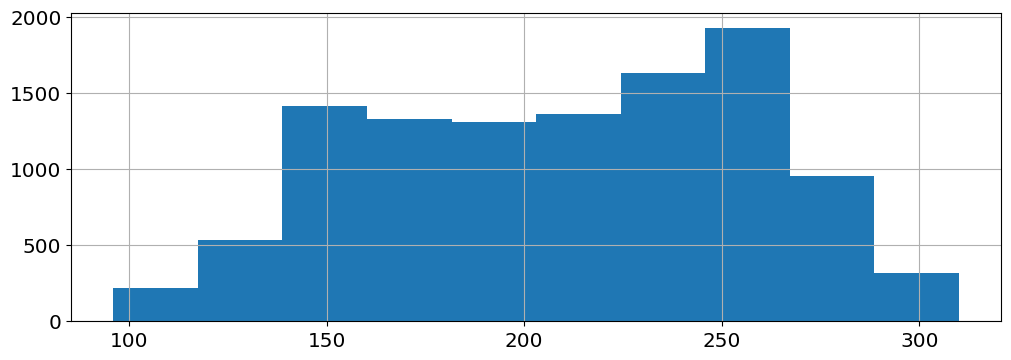

In [18]:
# If we can see if this afirmation above make sense we can create a histogram
df['custo_produto'].hist()

<AxesSubplot:>

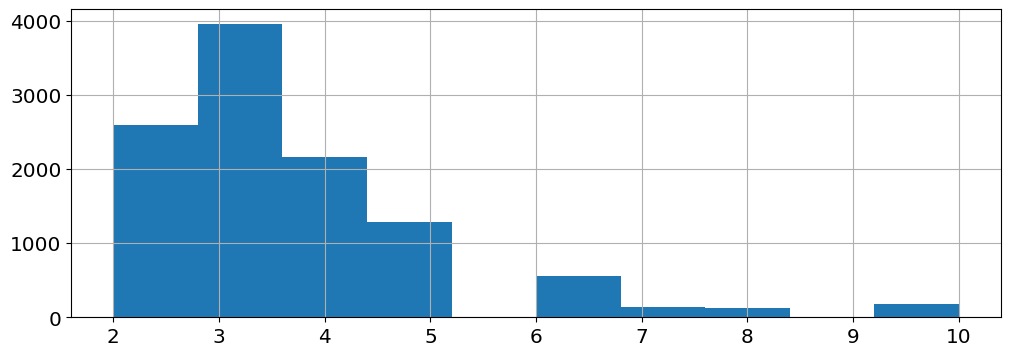

In [19]:
df['compras_anteriores'].hist()

<AxesSubplot:>

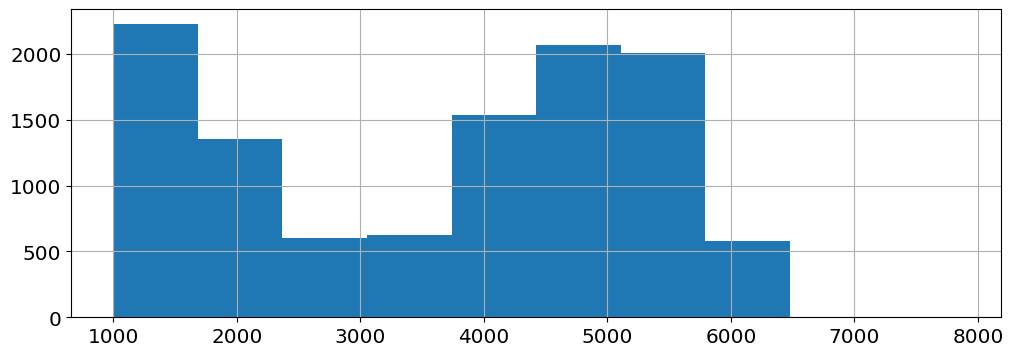

In [20]:
df['peso_gramas'].hist()

## Exploring the Categorical Variables

In [21]:
# Summary of the categorical variables
df[cats].describe()

,corredor_armazem,modo_envio,prioridade_produto,genero
count,11000,11000,11000,11000
unique,5,3,3,2
top,F,Navio,baixa,F
freq,3666,7463,5298,5546


In [22]:
# List the total by category
for col in cats:
    print(f'''Total of Category for Variable {col}:''')
    print(df[col].value_counts())
    print()

Total of Category for Variable corredor_armazem:
F    3666
D    1834
C    1834
A    1833
B    1833
Name: corredor_armazem, dtype: int64

Total of Category for Variable modo_envio:
Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

Total of Category for Variable prioridade_produto:
baixa    5298
media    4754
alta      948
Name: prioridade_produto, dtype: int64

Total of Category for Variable genero:
F    5546
M    5454
Name: genero, dtype: int64



## Univariate Analysis - Box Plots
- plt.subplot() - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
- sns.boxplot() - https://seaborn.pydata.org/generated/seaborn.boxplot.html
- plt.tight_layout() - https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py

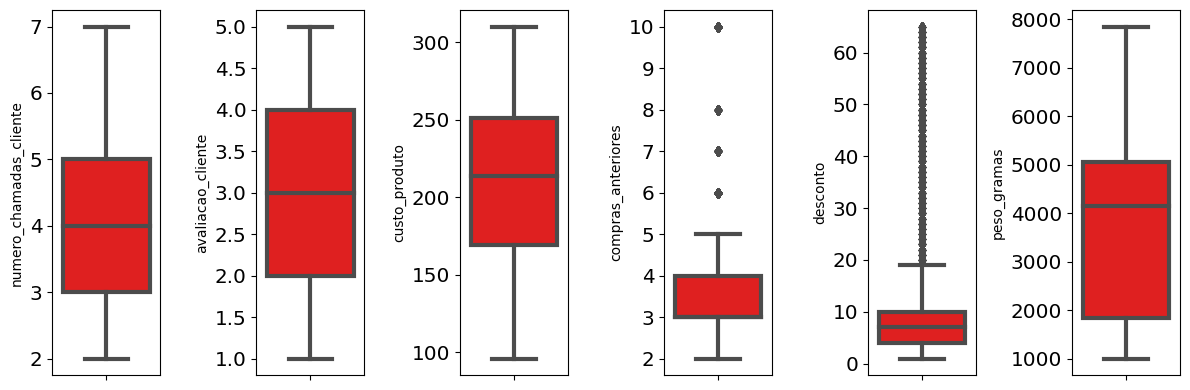

In [23]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y = df[features[i]], color = 'red', orient = 'v')
    plt.tight_layout()

## Univariate Analysis - Dist Plots
- sns.histplot() - https://seaborn.pydata.org/generated/seaborn.histplot.html

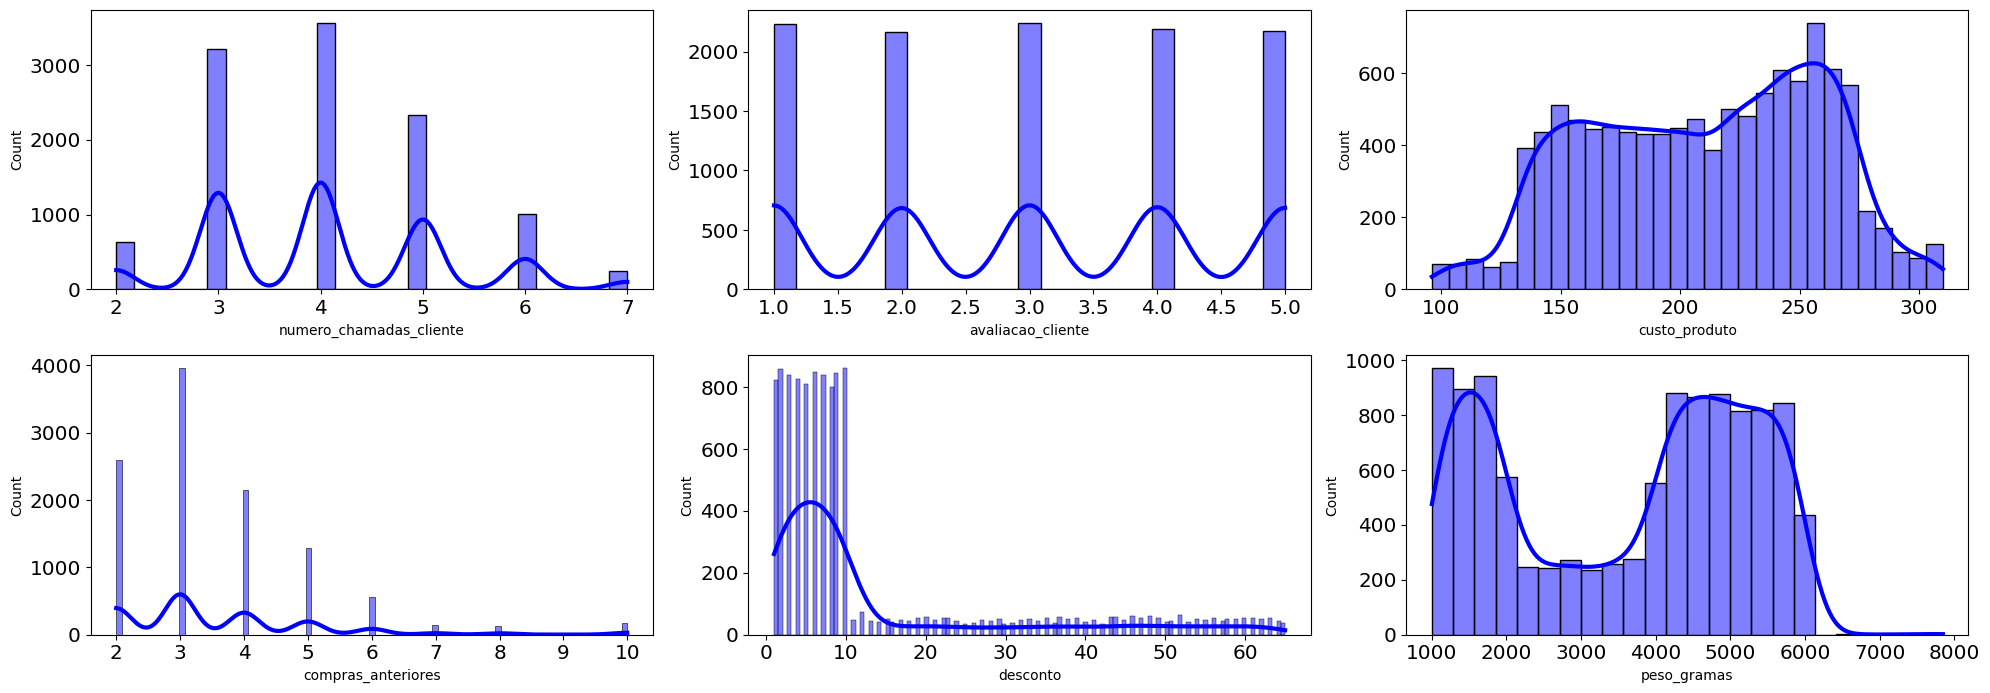

In [24]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    plt.subplot(3, len(nums)/2, i+1)
    sns.histplot(x = df[features[i]], kde = True, color = 'blue')
    plt.xlabel(features[i])
    plt.tight_layout()

## Univariate Analysis - Violin Plots
- sns.violinplot() - https://seaborn.pydata.org/generated/seaborn.violinplot.html

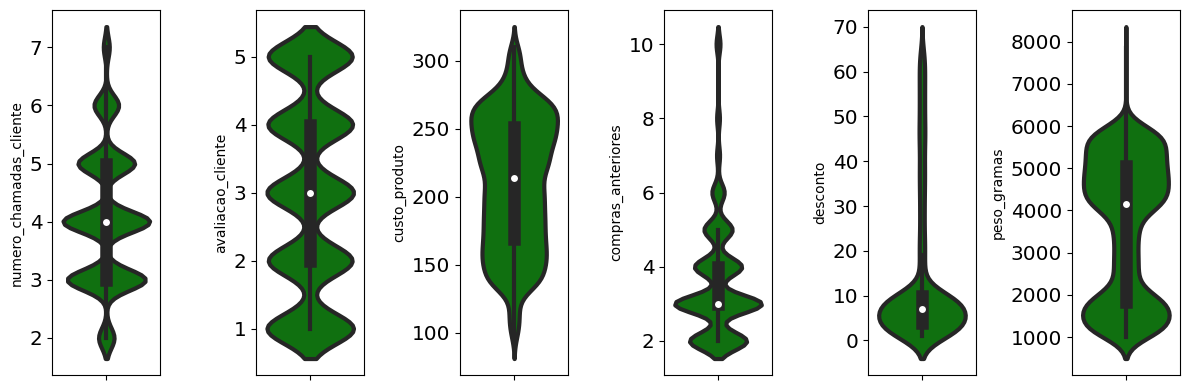

In [25]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y = df[nums[i]], color = 'green', orient = 'v')
    plt.tight_layout()

**From the graphs you can observe that:**
- The column `custo_produto` seems to be close to a normal distribution.
- As we suspect, the columns `compras_anteriores` and `desconto` are slightly inclined, which means that there is a possibility that we will need to do something with these columns later on. 
- For the column `peso_gramas` distribution uncertainty because it is shaped like a ‘U’.
- The columns `numero_chamadas_cliente` and `avaliação_cliente` are distributed uniformly.

## Univariate Analysis - Count Plot (Categorical)
- sns.countplot() - https://seaborn.pydata.org/generated/seaborn.countplot.html
- DataFrame.sample() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

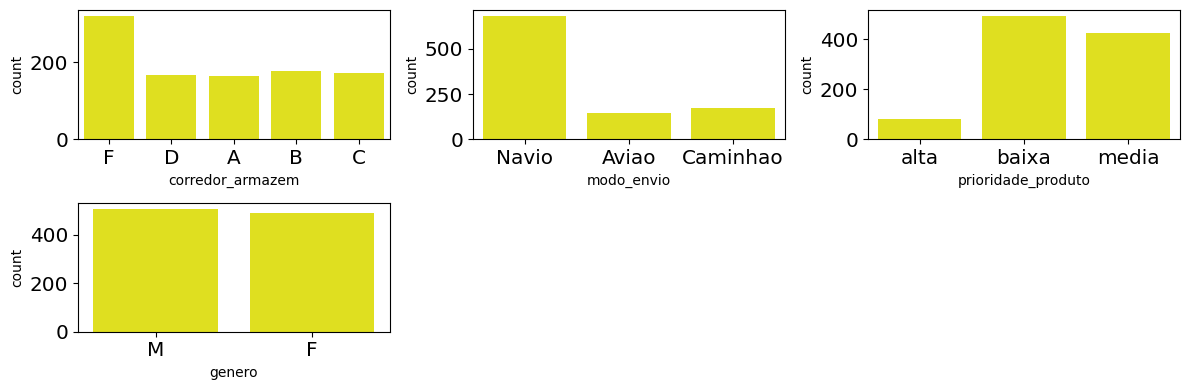

In [26]:
df_sample = df.sample(1000, random_state = 42)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df_sample[cats[i]], color = 'yellow', orient = 'v')
    plt.tight_layout()

<AxesSubplot:xlabel='entregue_no_prazo', ylabel='count'>

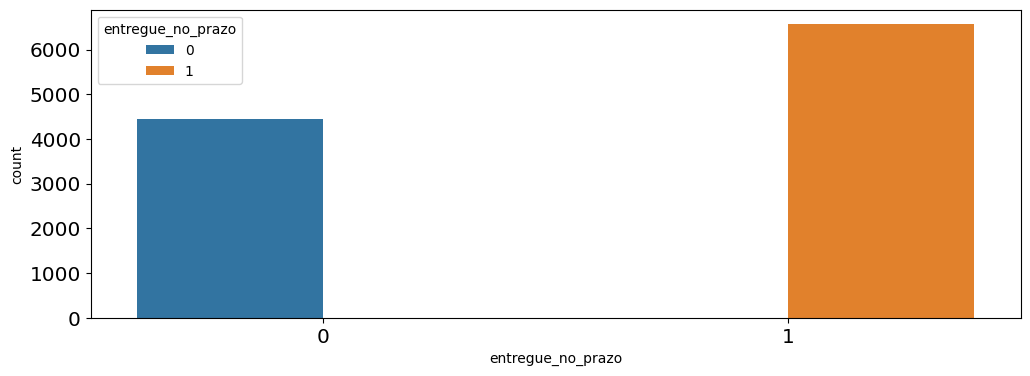

In [27]:
# Count Plot in the target variable
sns.countplot(data = df, x = df['entregue_no_prazo'], hue = 'entregue_no_prazo')

**From the graphs you can observe that:**
- Most of the products sent came from aisle F.
- Most common delivery method is by ship.
- There are few products with high delivery priority.
- The proportion of male and female customers is almost the same.
- The column `entregue_no_prazo` is binary, so there is no need to pay much attention to the shape of the distribution.

## Bivariate Analysis - Correlation matrix (Numerical)
**Heatmaps** - sns.heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [28]:
corr_df = df[nums].corr()

In [29]:
corr_df

,numero_chamadas_cliente,avaliacao_cliente,custo_produto,compras_anteriores,desconto,peso_gramas
numero_chamadas_cliente,1.000000,0.012212,0.323165,0.180760,-0.130747,-0.276593
avaliacao_cliente,0.012212,1.000000,0.009210,0.013119,-0.003095,-0.001823
custo_produto,0.323165,0.009210,1.000000,0.123746,-0.138343,-0.132689
compras_anteriores,0.180760,0.013119,0.123746,1.000000,-0.082804,-0.168295
desconto,-0.130747,-0.003095,-0.138343,-0.082804,1.000000,-0.375992
peso_gramas,-0.276593,-0.001823,-0.132689,-0.168295,-0.375992,1.000000


<AxesSubplot:>

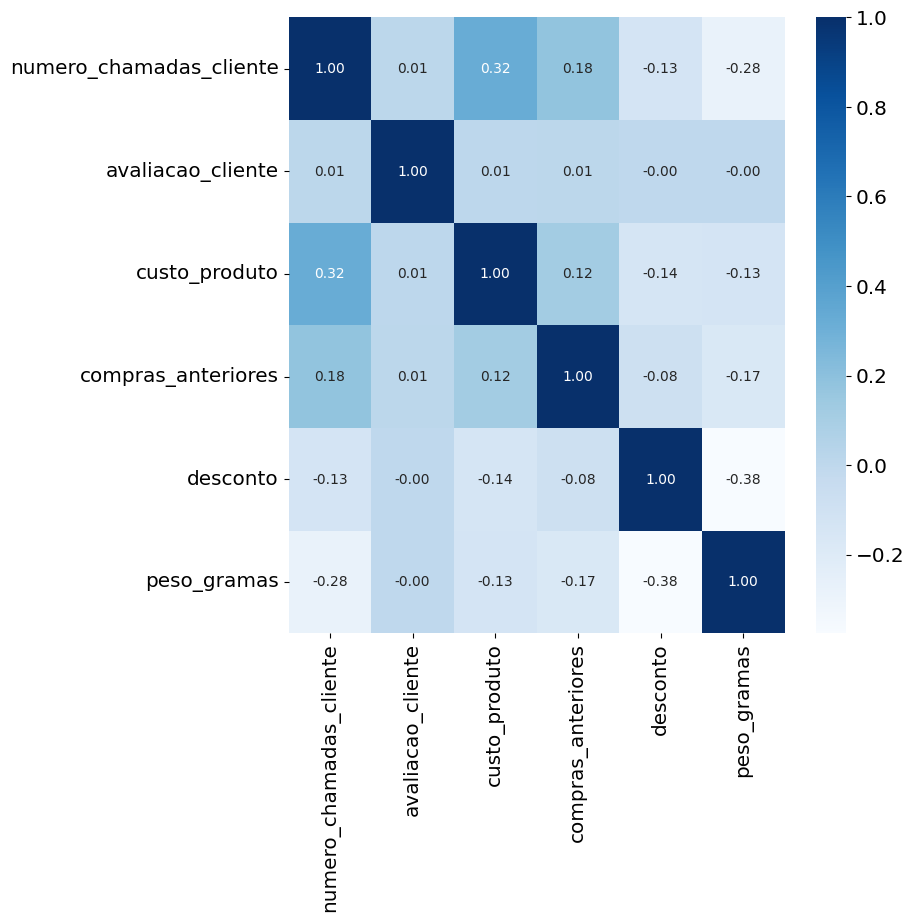

In [30]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f')

**From the graph above you can observe that:**
- There is a positive correlation between `numero_chamadas_clientes` and `custo_produto`.
- There is a positive correlation between `numero_chamadas_clientes` and `compras_anteriores`.
- There is a negative correlation between `desconto` and `peso_gramas`.
- There is a weak correlation between the other variables

**Note:** We does not use correlation with categorical variables. In that case we use association. 

## Bivariate Analysis - Pair Plot (Numerical)
sns.pairplot - https://seaborn.pydata.org/generated/seaborn.pairplot.html

<Figure size 1500x1500 with 0 Axes>

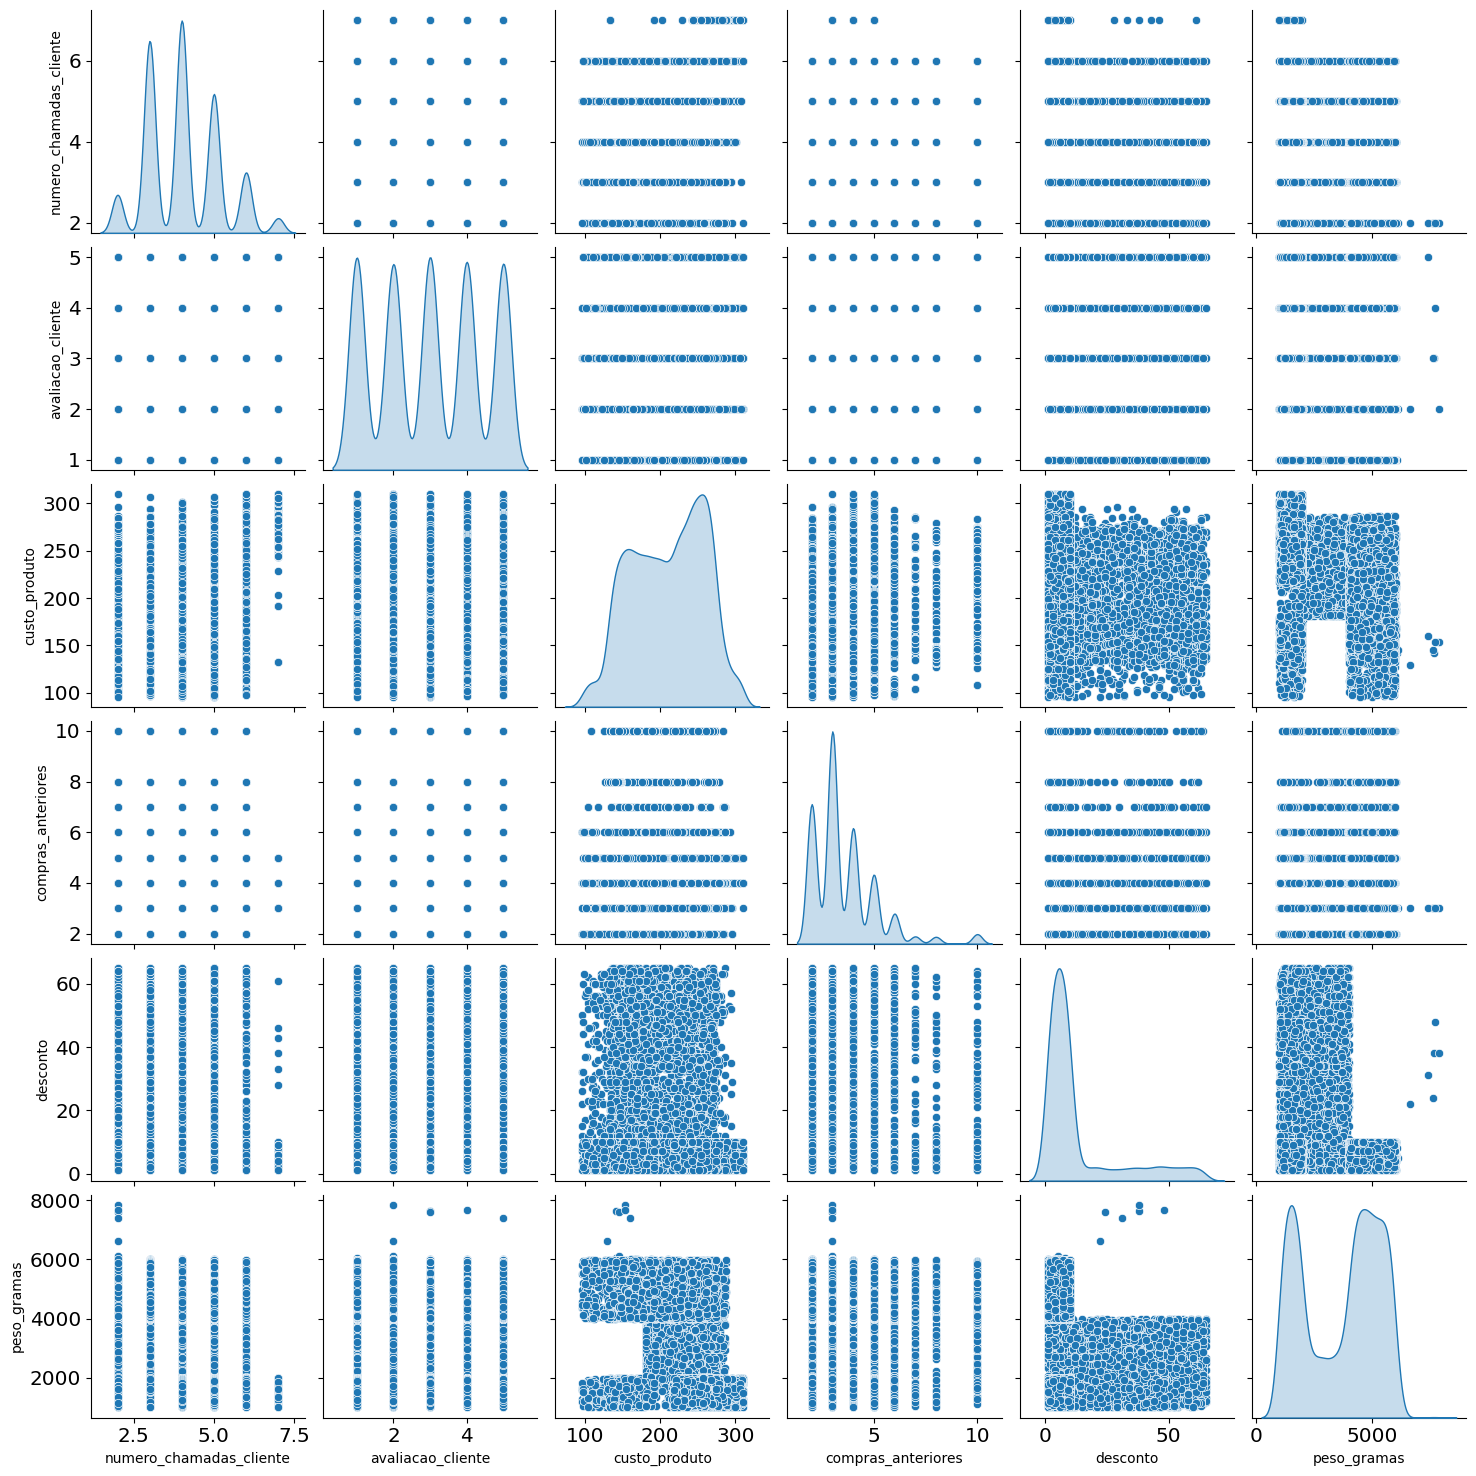

In [31]:
plt.figure(figsize = (15, 15))
sns.pairplot(df[nums], diag_kind = 'kde')

## Categorical Columns x Target Variable

In [32]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

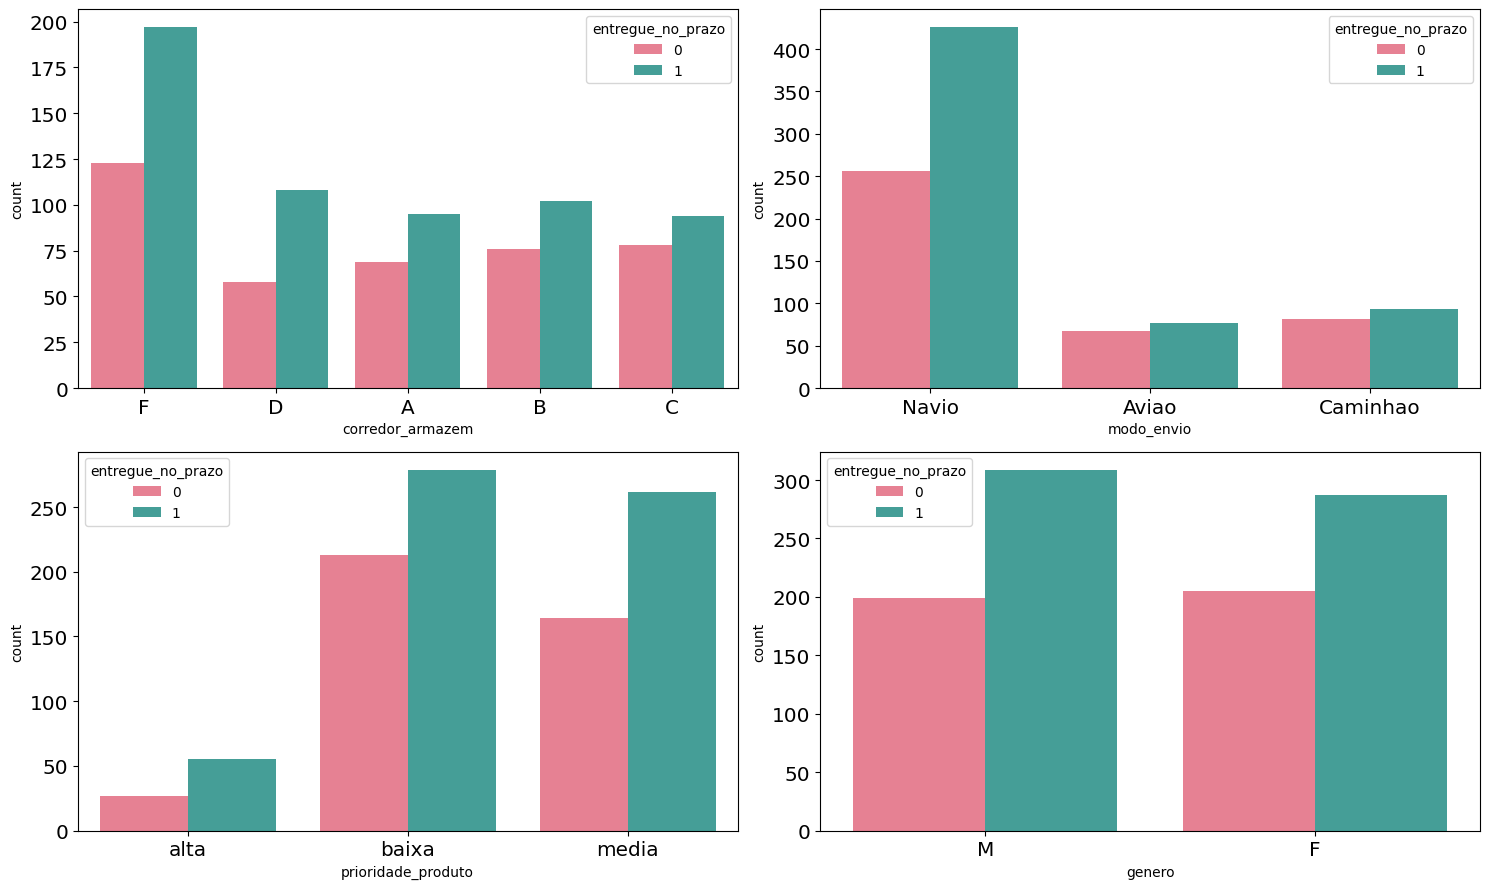

In [33]:
plt.figure(figsize = (15, 9))
features = cats
for i in range(0, len(features)):
    plt.subplot(2, 2, i+1)
    sns.countplot(data = df_sample, x = features[i], hue = 'entregue_no_prazo', palette="husl")
    plt.tight_layout()

**Notes:**
- Sending by by ship tends to be delayed.
- In `prioridade_produto` the low and medium categories tend to have delivery delays.
- In `corredor_armazem` productos from aisle F tend to present delivery delays.
- Products purchased by women have a slightly lower volume of on-time deliveries.

## Conclusion EDA Part 1

Some of the things that we found in this dataset are:
- The data seems valid and there are no major/significant defects.
- There are some distributions that are a bit *asymmetric*, this should be kept in mind if we use models that require a normal distribution.
- We did not detect any multicollinearity problems.
- Some features(variables) seem completely uncorrelated.
- The categorical features, `modo_envio`, `corredor_armazem` and `importancia_produto` seem useful for predicting the target variable.

# EDA - Part 2

#### 1. Are the delivery delays equally distributed among the method of delivery? Are there any discrepant differences?

In [34]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [35]:
# See that we have many more records for transactions where the delivery was via ship
# So have more delayes is normal
df['modo_envio'].value_counts()

Navio       7463
Aviao       1777
Caminhao    1760
Name: modo_envio, dtype: int64

> - pandas.DataFrame.agg() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
> - pandas.DataFrame.reset_index() - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

In [36]:
df_group1 = df.groupby(['entregue_no_prazo', 'modo_envio']).agg({'ID': 'nunique'}).reset_index()
df_group1

,entregue_no_prazo,modo_envio,ID
0,0,Aviao,708
1,0,Caminhao,725
2,0,Navio,3004
3,1,Aviao,1069
4,1,Caminhao,1035
5,1,Navio,4459


In [37]:
df_group2 = df.groupby(['entregue_no_prazo']).agg({'ID': 'nunique'}).reset_index()
df_group2

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [38]:
# 'ID_y' here is the total divided into delivered on time and not
df_group3 = df_group1.merge(df_group2, on = 'entregue_no_prazo')
df_group3

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,4437
1,0,Caminhao,725,4437
2,0,Navio,3004,4437
3,1,Aviao,1069,6563
4,1,Caminhao,1035,6563
5,1,Navio,4459,6563


In [39]:
df_group4 = df.groupby(['modo_envio']).agg({'ID': 'nunique'}).reset_index()
df_group4

,modo_envio,ID
0,Aviao,1777
1,Caminhao,1760
2,Navio,7463


In [40]:
# 'ID_y'here is the total split by delivery mode
df_group5 = df_group1.merge(df_group4, on = 'modo_envio')
df_group5

,entregue_no_prazo,modo_envio,ID_x,ID_y
0,0,Aviao,708,1777
1,1,Aviao,1069,1777
2,0,Caminhao,725,1760
3,1,Caminhao,1035,1760
4,0,Navio,3004,7463
5,1,Navio,4459,7463


In [41]:
# We use the df_group5, and calculate the percentage
# Create the columns 'Percentual(%)' in df_group5
df_group5['Percentual(%)'] = df_group5['ID_x'] / df_group5['ID_y'] * 100

In [42]:
# Rename columns
df_group5.columns = ['Status de Entrega no Prazo',
                    'Modo de Envio', 
                    'Total por Categoria',
                    'Total Geral',
                    'Percentual(%)']
df_group5

,Status de Entrega no Prazo,Modo de Envio,Total por Categoria,Total Geral,Percentual(%)
0,0,Aviao,708,1777,39.842431
1,1,Aviao,1069,1777,60.157569
2,0,Caminhao,725,1760,41.193182
3,1,Caminhao,1035,1760,58.806818
4,0,Navio,3004,7463,40.251909
5,1,Navio,4459,7463,59.748091


In [43]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

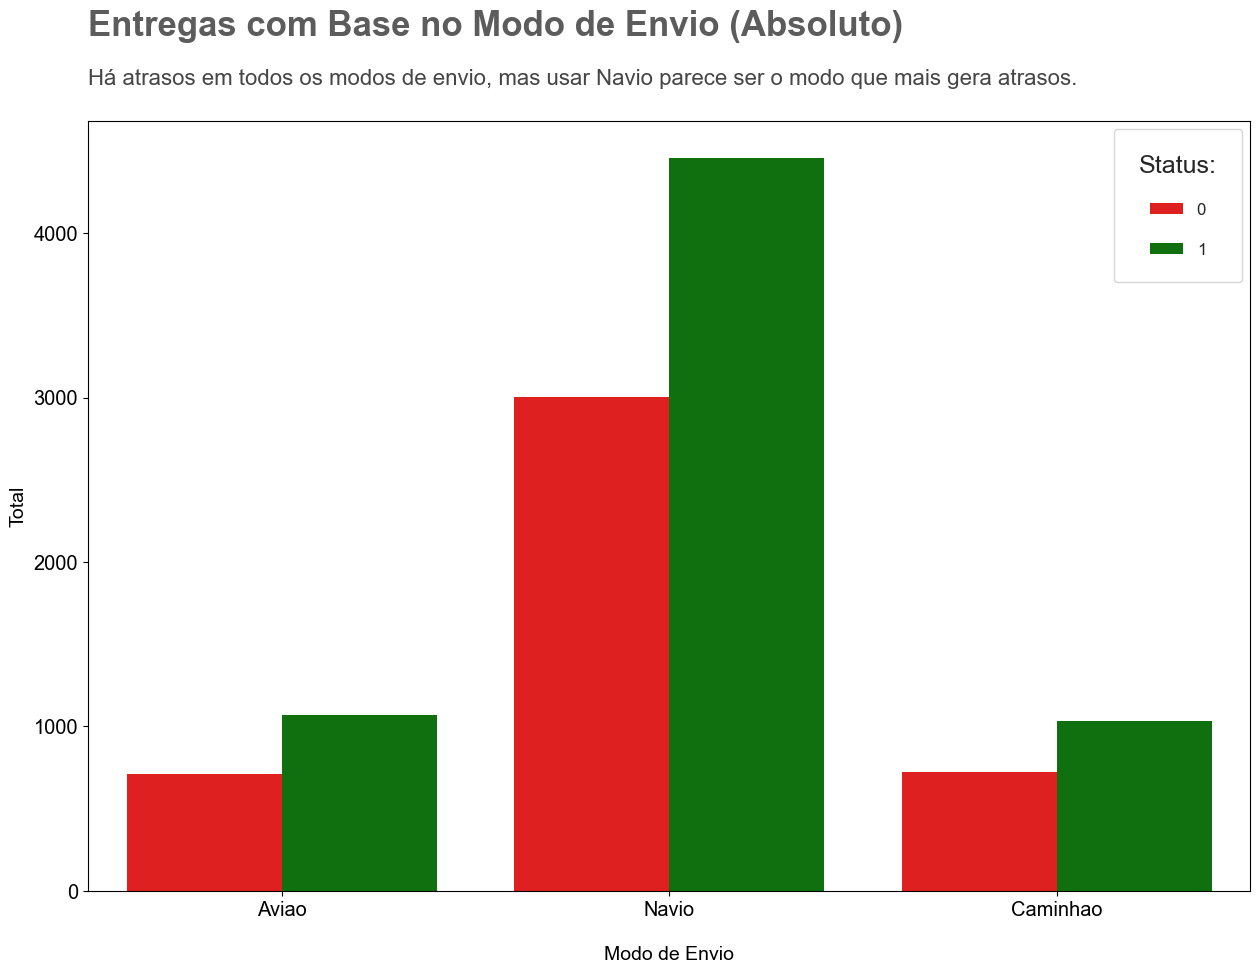

In [44]:
# Graph 1 - Analysis in absolute values

# Picture size
plt.figure(figsize = (15, 10))

# Chart
chart = sns.countplot(data = df,
                    x = 'modo_envio',
                    hue = 'entregue_no_prazo',
                    palette = ["red", "green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legend
plt.legend(loc = 'upper right',
          borderpad = 1.5,
          labelspacing = 1.5,
          fontsize = 12,
          title = 'Status:')

# Add title
chart.text(x = -0.5,
          y = 5200,
          s = "Entregas com Base no Modo de Envio (Absoluto)",
          fontsize = 25,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 4900,
          s = 'Há atrasos em todos os modos de envio, mas usar Navio parece ser o modo que mais gera atrasos.',
          fontsize = 16,
          alpha = .85);

In [45]:
df_group5.columns

Index(['Status de Entrega no Prazo', 'Modo de Envio', 'Total por Categoria',
       'Total Geral', 'Percentual(%)'],
      dtype='object')

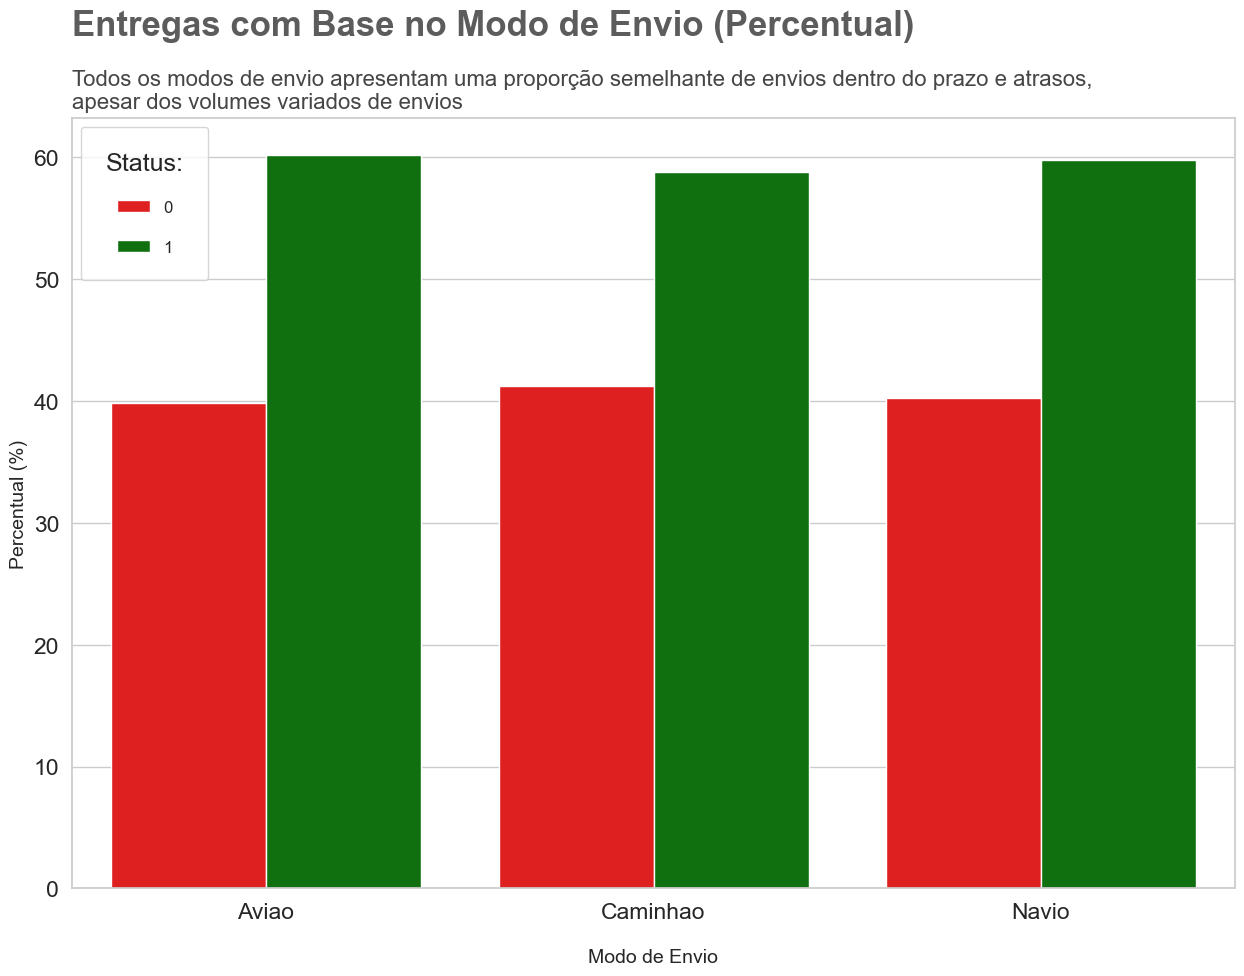

In [46]:
# Graph 2 - Analysis in percentage values

# Picture size
plt.figure(figsize = (15, 10))

# Chart
chart = sns.barplot(x = 'Modo de Envio',
                    y = 'Percentual(%)',
                    data = df_group5,
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red", "green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nModo de Envio", fontsize = 14)
chart.set_ylabel("Percentual (%)", fontsize = 14)

# Legend
plt.legend(loc = 'upper left',
          borderpad = 1.5,
          labelspacing = 1.5,
          fontsize = 12,
          title = 'Status:')

# Add title
chart.text(x = -0.5,
          y = 70,
          s = "Entregas com Base no Modo de Envio (Percentual)",
          fontsize = 25,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 64,
          s = 'Todos os modos de envio apresentam uma proporção semelhante de envios dentro do prazo e atrasos, \napesar dos volumes variados de envios',
          fontsize = 16,
          alpha = .85);

#### 2. What is the significant difference in delivery delays when the product has low or medium priority?

In [47]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [48]:
df_group11 = df.groupby(['entregue_no_prazo', 'prioridade_produto']).agg({'ID': 'nunique'}).reset_index()
df_group11

,entregue_no_prazo,prioridade_produto,ID
0,0,alta,332
1,0,baixa,2158
2,0,media,1947
3,1,alta,616
4,1,baixa,3140
5,1,media,2807


In [49]:
df_group12 = df.groupby(['entregue_no_prazo']).agg({'ID': 'nunique'}).reset_index()
df_group12

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [50]:
df_group13 = df_group11.merge(df_group12, on = 'entregue_no_prazo')
df_group13

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,4437
1,0,baixa,2158,4437
2,0,media,1947,4437
3,1,alta,616,6563
4,1,baixa,3140,6563
5,1,media,2807,6563


In [51]:
df_group14 = df.groupby(['prioridade_produto']).agg({'ID': 'nunique'}).reset_index()
df_group14

,prioridade_produto,ID
0,alta,948
1,baixa,5298
2,media,4754


In [52]:
df_group15 = df_group11.merge(df_group14, on = 'prioridade_produto')
df_group15

,entregue_no_prazo,prioridade_produto,ID_x,ID_y
0,0,alta,332,948
1,1,alta,616,948
2,0,baixa,2158,5298
3,1,baixa,3140,5298
4,0,media,1947,4754
5,1,media,2807,4754


In [53]:
df_group13['Percentual(%)'] = df_group13['ID_x'] / df_group13['ID_y'] * 100
df_group13.columns = ['Status de Entrega no Prazo',
                     'Prioridade do Produto',
                     'Total Por Categoria',
                     'Total Geral',
                     'Percentual(%)']
df_group13

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,4437,7.482533
1,0,baixa,2158,4437,48.636466
2,0,media,1947,4437,43.881001
3,1,alta,616,6563,9.385952
4,1,baixa,3140,6563,47.843974
5,1,media,2807,6563,42.770075


In [54]:
df_group15['Percentual(%)'] = df_group15['ID_x'] / df_group15['ID_y'] * 100
df_group15.columns = ['Status de Entrega no Prazo',
                     'Prioridade do Produto',
                     'Total Por Categoria',
                     'Total Geral',
                     'Percentual(%)']
df_group15

,Status de Entrega no Prazo,Prioridade do Produto,Total Por Categoria,Total Geral,Percentual(%)
0,0,alta,332,948,35.021097
1,1,alta,616,948,64.978903
2,0,baixa,2158,5298,40.732352
3,1,baixa,3140,5298,59.267648
4,0,media,1947,4754,40.954985
5,1,media,2807,4754,59.045015


In [55]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

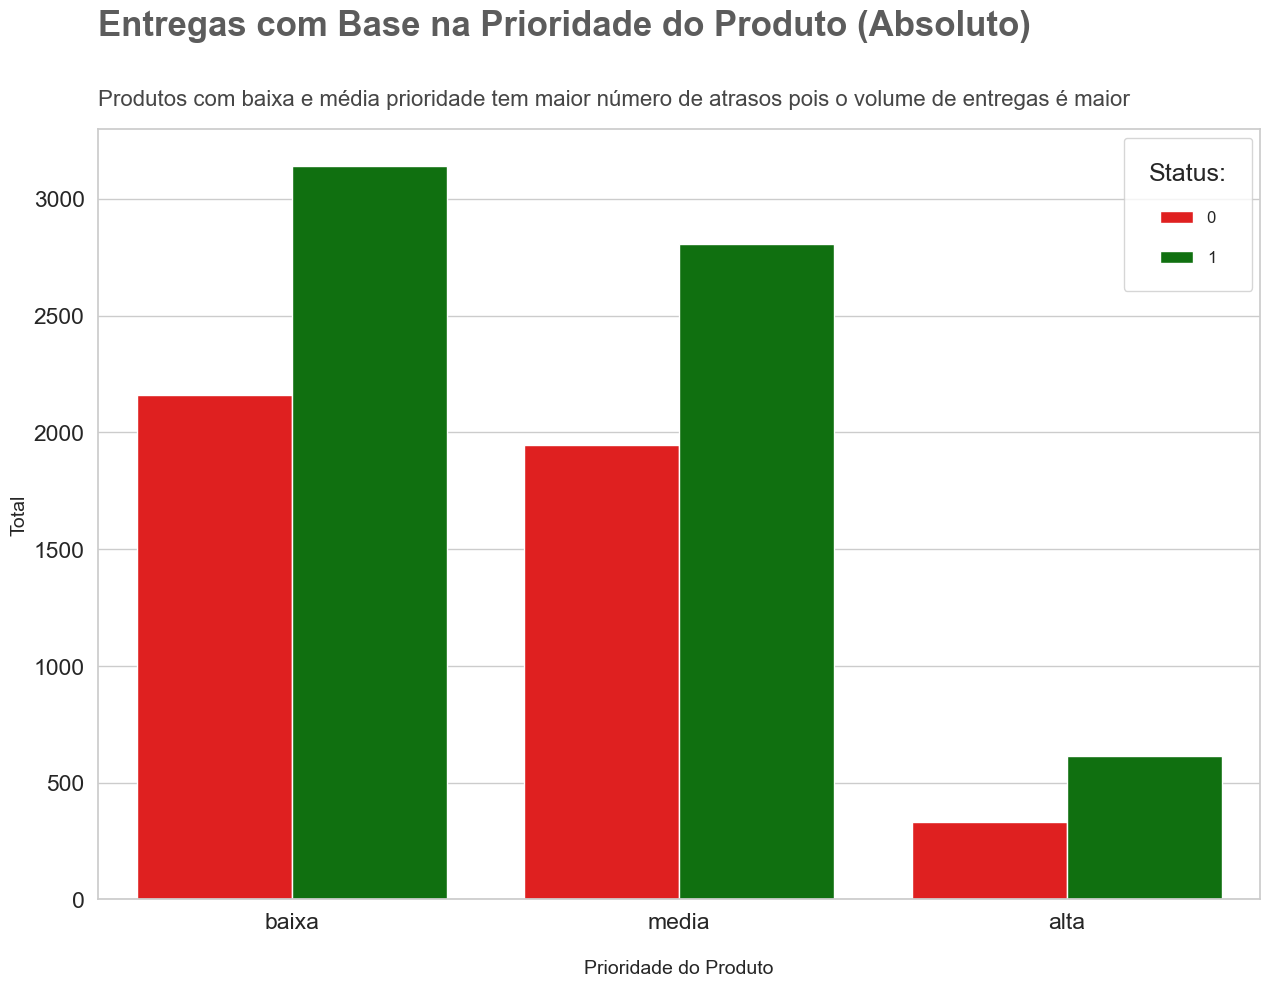

In [56]:
# Graph 1 - Analysis in absolute values
plt.figure(figsize = (15, 10))
chart = sns.countplot(data = df,
                     x = 'prioridade_produto',
                     hue = 'entregue_no_prazo',
                     palette = ["red", "green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legend
plt.legend(loc = 'upper right',
          borderpad = 1.5,
          labelspacing = 1.5,
          fontsize = 12,
          title = 'Status:')

# Add title
chart.text(x = -0.5,
          y = 3700,
          s = "Entregas com Base na Prioridade do Produto (Absoluto)",
          fontsize = 25,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 3400,
          s = 'Produtos com baixa e média prioridade tem maior número de atrasos pois o volume de entregas é maior',
          fontsize = 16,
          alpha = .85);

In [57]:
df_group15.columns

Index(['Status de Entrega no Prazo', 'Prioridade do Produto',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

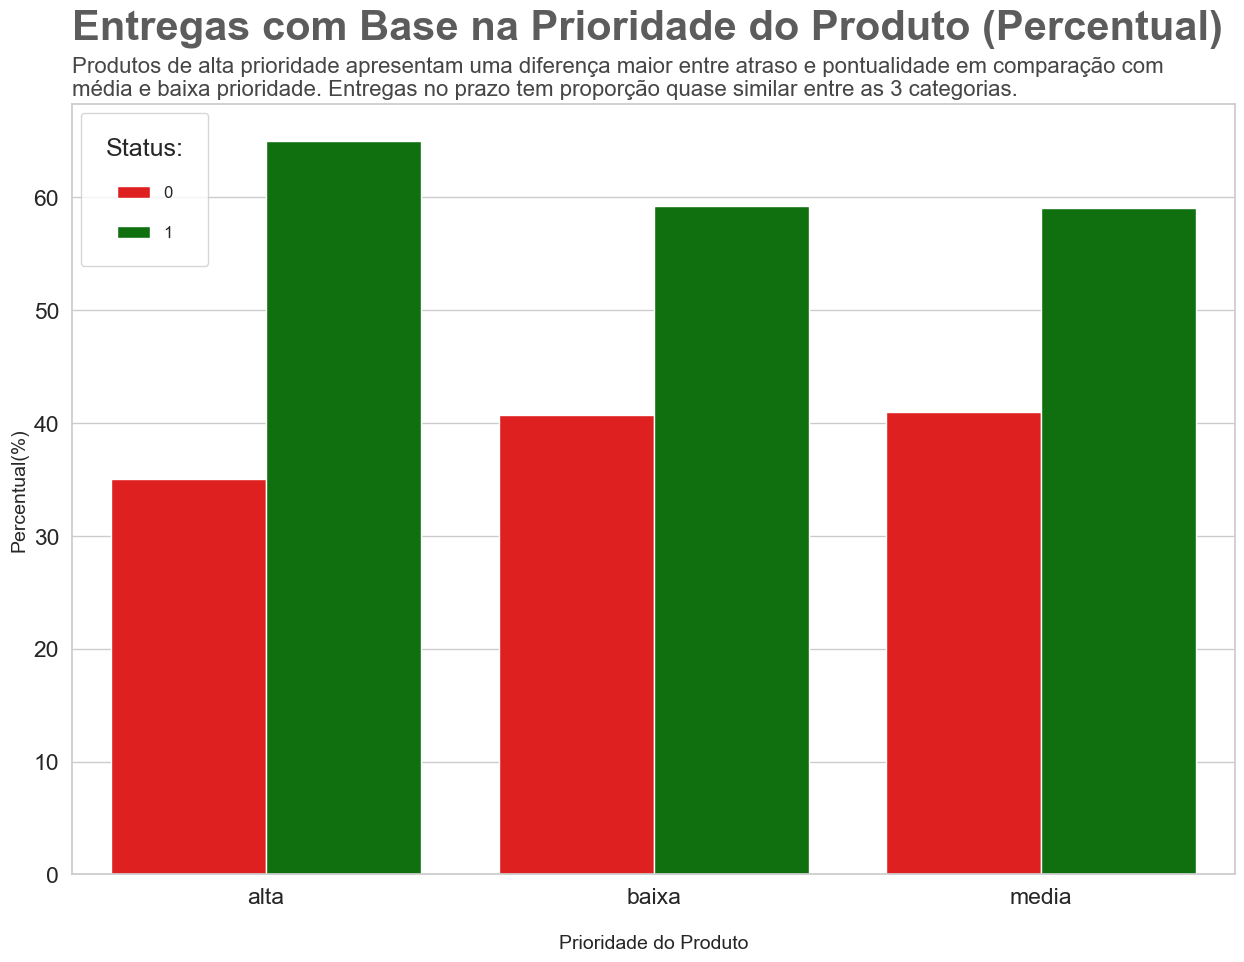

In [58]:
# Graph 2 - Analysis in Percentage values
plt.figure(figsize = (15, 10))
chart = sns.barplot(x = 'Prioridade do Produto',
                    y = 'Percentual(%)',
                    data = df_group15,
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red", "green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nPrioridade do Produto", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)

# Legend
plt.legend(loc = 'upper left',
          borderpad = 1.5,
          labelspacing = 1.5,
          fontsize = 12,
          title = 'Status:')

# Add title
chart.text(x = -0.5,
          y = 74,
          s = "Entregas com Base na Prioridade do Produto (Percentual)",
          fontsize = 30,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 69,
          s = 'Produtos de alta prioridade apresentam uma diferença maior entre atraso e pontualidade em comparação com \nmédia e baixa prioridade. Entregas no prazo tem proporção quase similar entre as 3 categorias.',
          fontsize = 16,
          alpha = .85);

#### 3. Which aisles store products with the highest proportion of late deliveries?

In [59]:
df.columns

Index(['ID', 'corredor_armazem', 'modo_envio', 'numero_chamadas_cliente',
       'avaliacao_cliente', 'custo_produto', 'compras_anteriores',
       'prioridade_produto', 'genero', 'desconto', 'peso_gramas',
       'entregue_no_prazo'],
      dtype='object')

In [60]:
df_group21 = df.groupby(['entregue_no_prazo', 'corredor_armazem']).agg({'ID': 'nunique'}).reset_index()
df_group21

,entregue_no_prazo,corredor_armazem,ID
0,0,A,758
1,0,B,729
2,0,C,740
3,0,D,738
4,0,F,1472
5,1,A,1075
6,1,B,1104
7,1,C,1094
8,1,D,1096
9,1,F,2194


In [61]:
df_group22 = df.groupby(['entregue_no_prazo']).agg({'ID': 'nunique'}).reset_index()
df_group22

,entregue_no_prazo,ID
0,0,4437
1,1,6563


In [62]:
df_group23 = df_group21.merge(df_group22, on = 'entregue_no_prazo')
df_group23

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,4437
1,0,B,729,4437
2,0,C,740,4437
3,0,D,738,4437
4,0,F,1472,4437
5,1,A,1075,6563
6,1,B,1104,6563
7,1,C,1094,6563
8,1,D,1096,6563
9,1,F,2194,6563


In [63]:
df_group23['Percentual(%)'] = df_group23['ID_x'] / df_group23['ID_y'] * 100
df_group23.columns = ['Status de Entrega no Prazo',
                      'Corredor do Armazem',
                      'Total Por Categoria',
                      'Total Geral',
                      'Percentual(%)']
df_group23

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,4437,17.083615
1,0,B,729,4437,16.430020
2,0,C,740,4437,16.677936
3,0,D,738,4437,16.632860
4,0,F,1472,4437,33.175569
5,1,A,1075,6563,16.379704
6,1,B,1104,6563,16.821575
7,1,C,1094,6563,16.669206
8,1,D,1096,6563,16.699680
9,1,F,2194,6563,33.429834


In [64]:
df_group24 = df.groupby(['corredor_armazem']).agg({'ID': 'nunique'}).reset_index()
df_group24

,corredor_armazem,ID
0,A,1833
1,B,1833
2,C,1834
3,D,1834
4,F,3666


In [65]:
df_group25 = df_group21.merge(df_group24, on = 'corredor_armazem')
df_group25

,entregue_no_prazo,corredor_armazem,ID_x,ID_y
0,0,A,758,1833
1,1,A,1075,1833
2,0,B,729,1833
3,1,B,1104,1833
4,0,C,740,1834
5,1,C,1094,1834
6,0,D,738,1834
7,1,D,1096,1834
8,0,F,1472,3666
9,1,F,2194,3666


In [66]:
df_group25['Percentual(%)'] = df_group25['ID_x'] / df_group25['ID_y'] * 100
df_group25.columns = ['Status de Entrega no Prazo',
                     'Corredor do Armazem',
                     'Total Por Categoria',
                     'Total Geral',
                     'Percentual(%)']
df_group25

,Status de Entrega no Prazo,Corredor do Armazem,Total Por Categoria,Total Geral,Percentual(%)
0,0,A,758,1833,41.352973
1,1,A,1075,1833,58.647027
2,0,B,729,1833,39.770867
3,1,B,1104,1833,60.229133
4,0,C,740,1834,40.348964
5,1,C,1094,1834,59.651036
6,0,D,738,1834,40.239913
7,1,D,1096,1834,59.760087
8,0,F,1472,3666,40.152755
9,1,F,2194,3666,59.847245


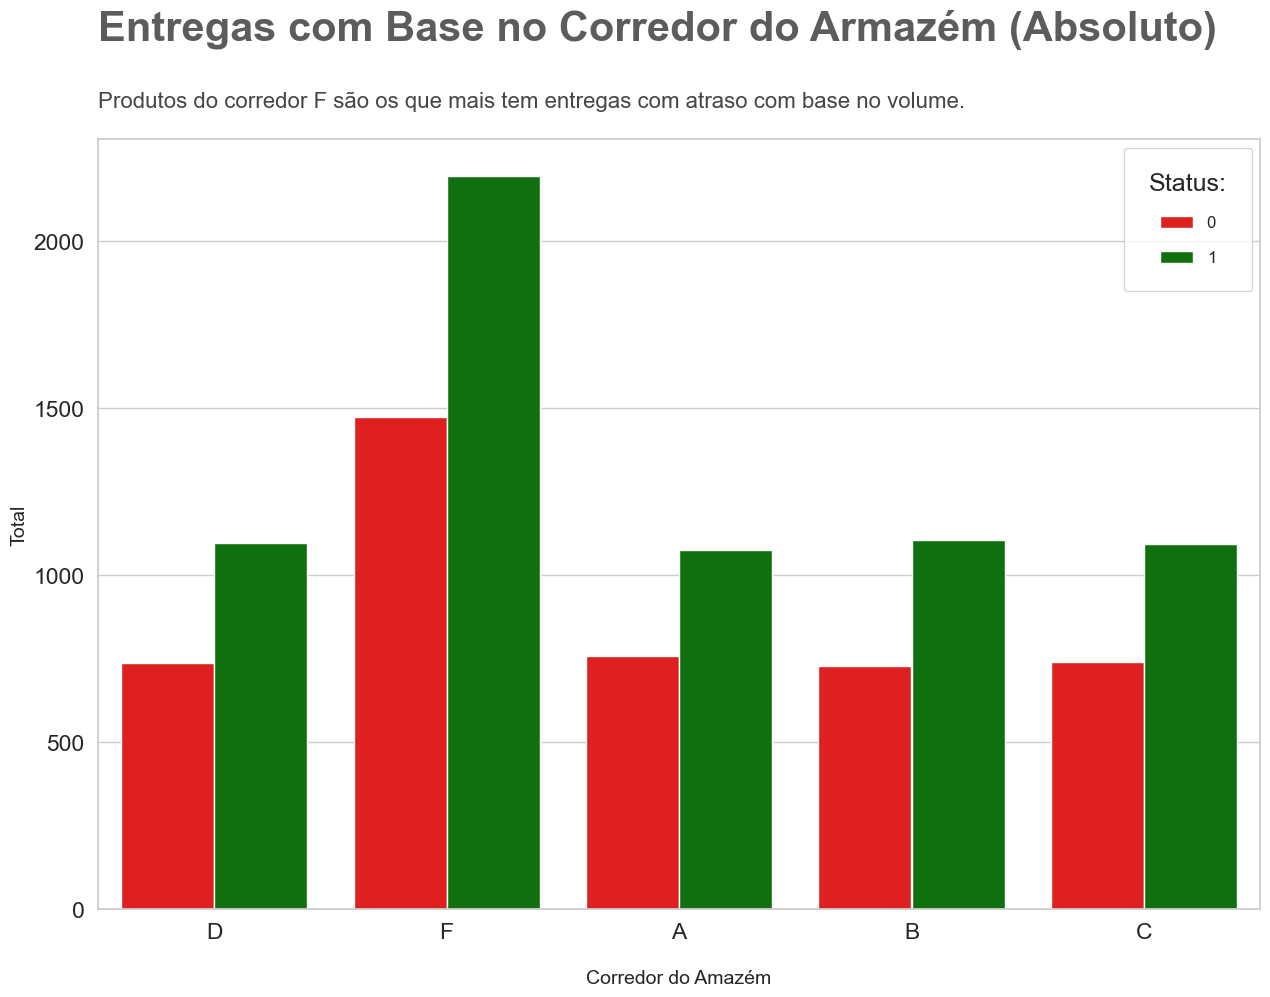

In [67]:
# Graph 1 - Analysis in absolute values
plt.figure(figsize = (15, 10))
chart = sns.countplot(data = df,
                     x = 'corredor_armazem',
                     hue = 'entregue_no_prazo',
                     palette = ["red", "green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nCorredor do Amazém", fontsize = 14)
chart.set_ylabel("Total", fontsize = 14)

# Legend
plt.legend(loc = 'upper right',
          borderpad = 1.5,
          labelspacing = 1.2,
          fontsize = 12,
          title = 'Status:')

# Add title
chart.text(x = -0.5,
          y = 2600,
          s = "Entregas com Base no Corredor do Armazém (Absoluto)",
          fontsize = 30,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 2400,
          s = 'Produtos do corredor F são os que mais tem entregas com atraso com base no volume.',
          fontsize = 16,
          alpha = .85);

In [68]:
df_group25.columns

Index(['Status de Entrega no Prazo', 'Corredor do Armazem',
       'Total Por Categoria', 'Total Geral', 'Percentual(%)'],
      dtype='object')

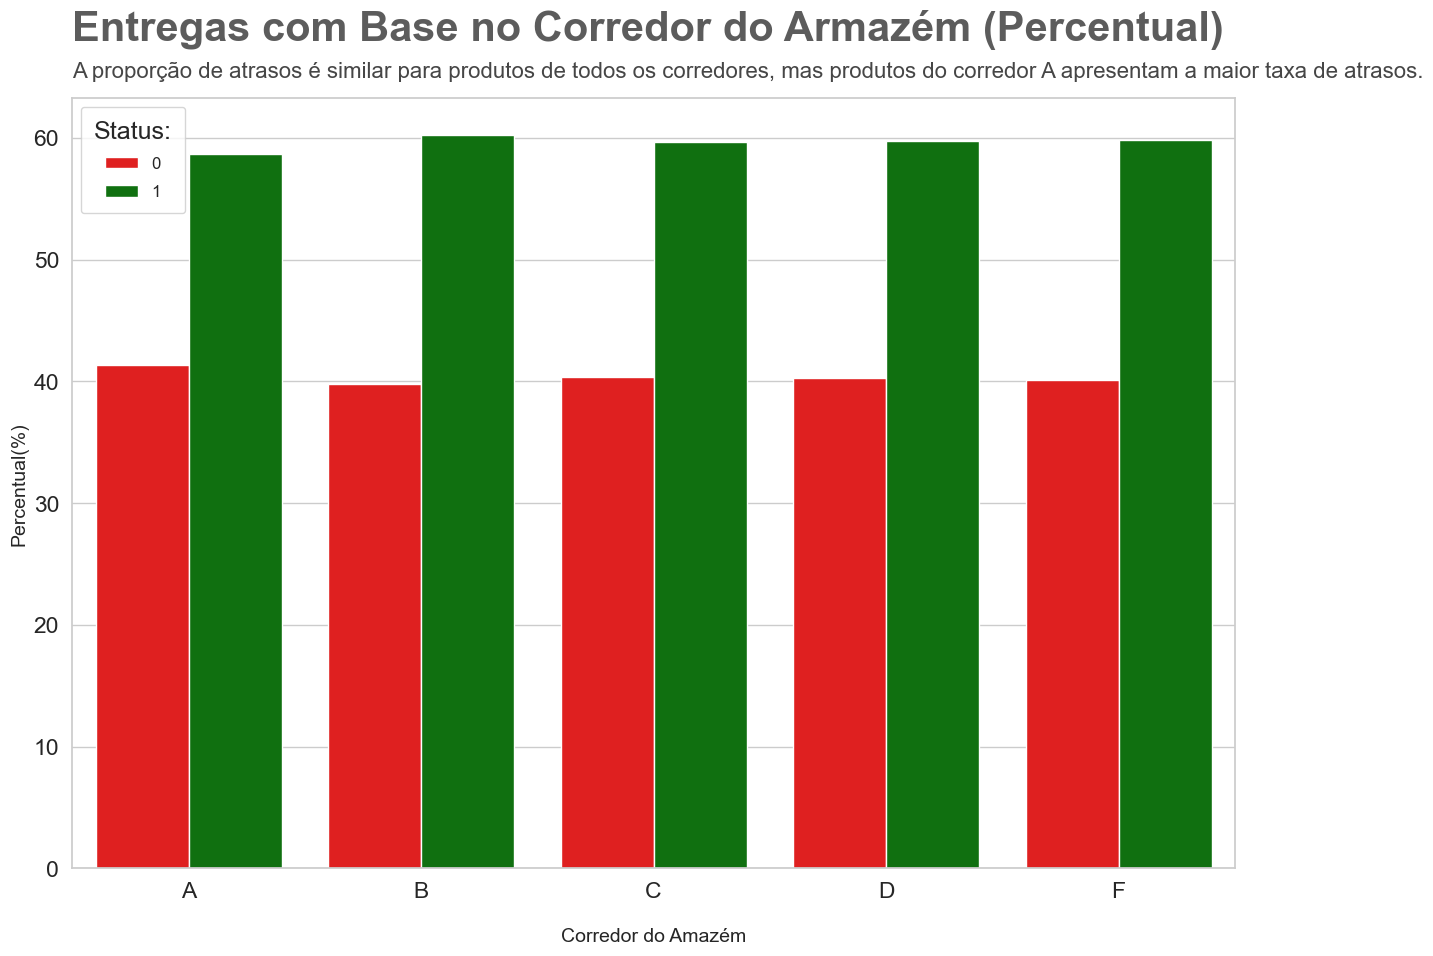

In [69]:
# Graph 2 - Analysis in Percentage values
plt.figure(figsize = (15, 10))
chart = sns.barplot(x = 'Corredor do Armazem',
                    y = 'Percentual(%)',
                    data = df_group25,
                    hue = 'Status de Entrega no Prazo',
                    palette = ["red", "green"])

# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('whitegrid')
sns.set_palette('prism')
chart.set_xlabel("\nCorredor do Amazém", fontsize = 14)
chart.set_ylabel("Percentual(%)", fontsize = 14)

# Legend
plt.legend(loc = 'upper left',
          borderpad = 0.8,
          labelspacing = 0.8,
          fontsize = 12,
          title = 'Status:')

# Add title
chart.text(x = -0.5,
          y = 68,
          s = "Entregas com Base no Corredor do Armazém (Percentual)",
          fontsize = 30,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -0.5,
          y = 65,
          s = 'A proporção de atrasos é similar para produtos de todos os corredores, mas produtos do corredor A apresentam a maior taxa de atrasos.',
          fontsize = 16,
          alpha = .85);

### Ninja challenge:

#### How does the density of the discount variable influence the delivery status of the products?
Answer with just one graph and one line of code!
- sns.kdeplot - https://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot

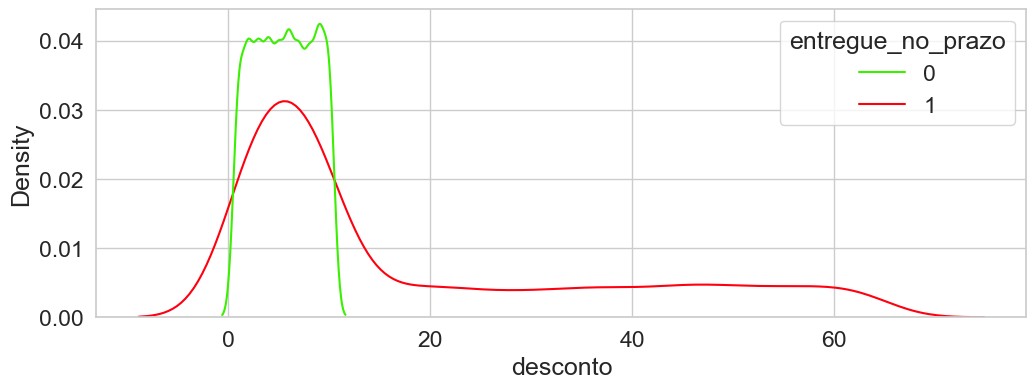

In [70]:
sns.kdeplot(data = df, x = 'desconto', hue = 'entregue_no_prazo');

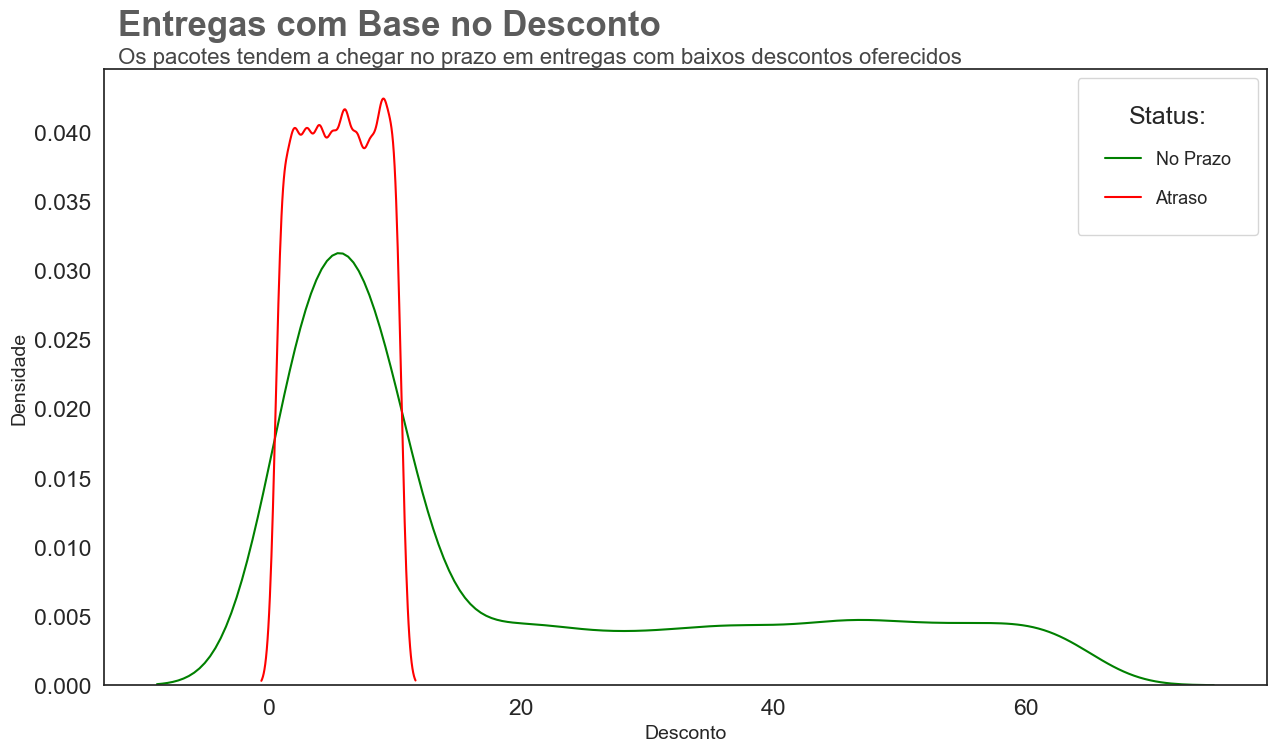

In [84]:
# formatted challenge graph
plt.figure(figsize = (15, 8))
chart = sns.kdeplot(data = df,
                    x = 'desconto',
                    hue = 'entregue_no_prazo',
                    palette = ["red", "green"])


# Style and labels
sns.set(font_scale = 1.5)
sns.set_style('white')
sns.set_palette('prism')
chart.set_xlabel("Desconto", fontsize = 14)
chart.set_ylabel("Densidade", fontsize = 14)

# Legend
plt.legend(loc = 'upper right',
          borderpad = 1.5,
          labelspacing = 1.2,
          fontsize = 13,
          title = 'Status:',
          labels = ['No Prazo', 'Atraso'])


# Add title
chart.text(x = -12,
          y = 0.047,
          s = "Entregas com Base no Desconto",
          fontsize = 25,
          weight = 'bold',
          alpha = .75)

# Add Subtitle
chart.text(x = -12,
          y = 0.045,
          s = 'Os pacotes tendem a chegar no prazo em entregas com baixos descontos oferecidos',
          fontsize = 16,
          alpha = .85);

# THE END